<a href="https://colab.research.google.com/github/selcuk-yalcin/TrustworthyML/blob/main/Crossvalidation_Score_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

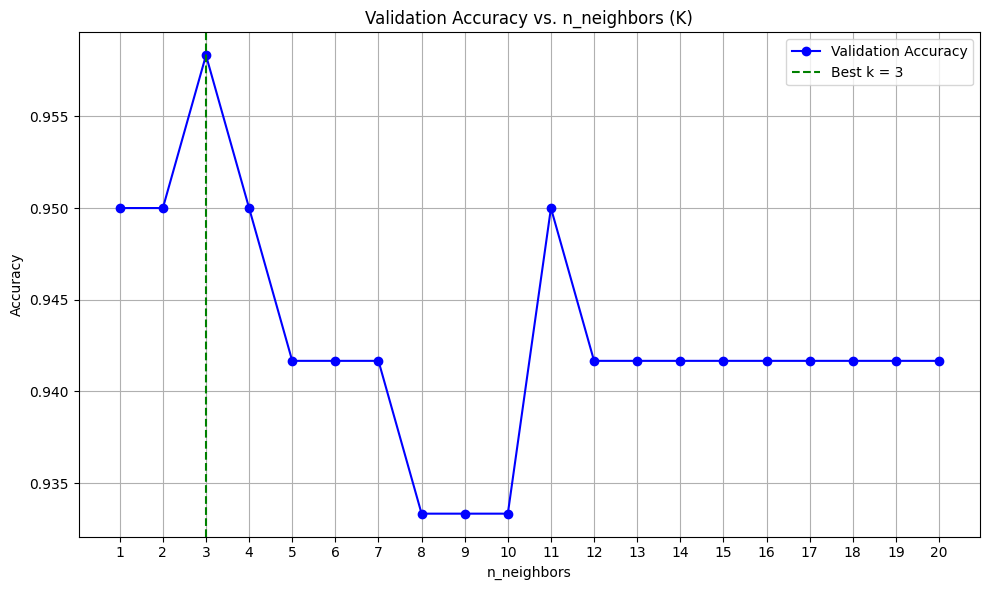

Best K: 3
Validation Accuracy (CV): 0.9583
Test Accuracy: 1.0000


In [ ]:
# Step 1: Split into Training + Test Set (Test set is held out for final evaluation)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Hyperparameter tuning using 5-fold cross-validation on training set
param_range = list(range(1, 21))
param_grid = {'n_neighbors': param_range}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

In [ ]:
# Step 3: Select best model and refit it on the full training set
best_k = grid.best_params_['n_neighbors']
best_model = grid.best_estimator_

In [ ]:
# Step 4: Evaluate the selected model on the independent test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

Average Resubstitution Accuracy: 100.00%
Average OOB Accuracy: 94.42%


In [ ]:
# Step 5: Optionally refit model on all data (train + test) for deployment
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X, y)

In [ ]:
# Visualization of Validation Accuracy vs. K
mean_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_scores, marker='o', color='blue', label='Validation Accuracy')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best k = {best_k}')
plt.title('Validation Accuracy vs. n_neighbors (K)')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
print(f"Best K: {best_k}")
print(f"Validation Accuracy (CV): {grid.best_score_:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")